In [211]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 

## Задача 3

#### Создадим данные в виде странной шумной квадратной экспоненты на случайной сетке

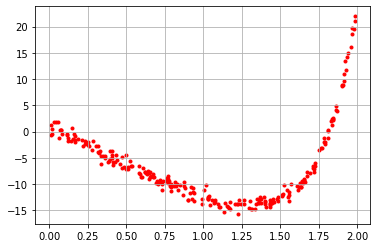

In [18]:
SIZE = 250
x = 2 * np.random.rand(SIZE)
y = np.exp(x ** 2) - 15 * x
y += np.random.normal(0, .8, SIZE)
fig, ax = plt.subplots()
ax.scatter(x,y, c='r', marker = '.')
ax.grid()
plt.show()

In [19]:
DEGREE = 8
polynomial_features = PolynomialFeatures(degree = DEGREE)
X = polynomial_features.fit_transform(x.reshape(-1,1))

In [20]:
def make_L1_GD_iteration(X, y, w, mu=0.1, lr=0.1):
    grad = 2*(X @ w - y) @ X + mu * np.sign(w)
    return w - lr * grad

#### Попробуем обучиться

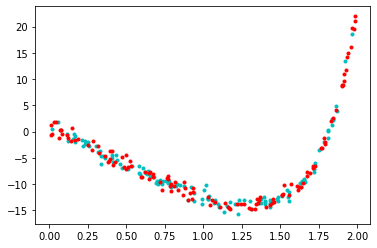

X_train.shape = (125, 9) y_train.shape = (125,)


In [21]:
part = int(np.round(SIZE/2))
X_train = X[:part]
y_train = y[:part]
X_test = X[part:]
y_test = y[part:]

plt.scatter(x[:part], y_train, c='c', marker='.')
plt.scatter(x[part:], y_test, c='r',marker='.')
plt.show()

print('X_train.shape =', X_train.shape, 'y_train.shape =', y_train.shape)

#### Инициализируем веса и посмотрим, что с ними будет

In [22]:
w0 = np.random.normal(0, 0.4, X_train.shape[1])
print(w0)
w1 = make_L1_GD_iteration(X_train, y_train, w0)
print(w1)
w = w0
for _ in range(20):
    w = make_L1_GD_iteration(X_train, y_train, w)
print(w)
print('учимся ежжи :)')

[ 0.36383702 -0.8504162   0.35761133  0.4444993   0.45542933  0.16147554
  0.14690388  0.64293105  0.09009858]
[  -563.24096591   -832.24762819  -1324.18340448  -2198.82069128
  -3746.04390738  -6495.67033314 -11410.6572228  -20249.21354962
 -36233.37916032]
[3.29362635e+96 5.71019826e+96 1.00169757e+97 1.77403931e+97
 3.16698426e+97 5.69205168e+97 1.02903552e+98 1.86986614e+98
 3.41310896e+98]
учимся ежжи :)


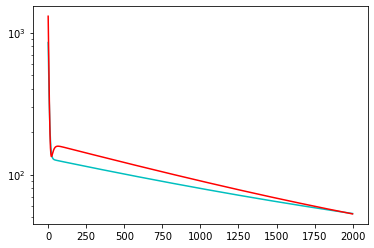

In [23]:
# теперь немного серьезнее
w = w0
lr = 10e-8
mu = 0.1
iter_number = 2000

train_losses = []
test_losses = []

for _ in range(iter_number):
    
    w = make_L1_GD_iteration(X_train, y_train, w, mu, lr)
    
    y_train_pred = X_train @ w
    y_test_pred = X_test @ w
    
    mse_train = mean_squared_error(y_train_pred, y_train)
    mse_test = mean_squared_error(y_test_pred, y_test)
    
    train_losses.append(mse_train)
    test_losses.append(mse_test)

plt.plot(range(len(train_losses)), train_losses, c='c')
plt.plot(range(len(test_losses)), test_losses, c='r')
plt.yscale('log')
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

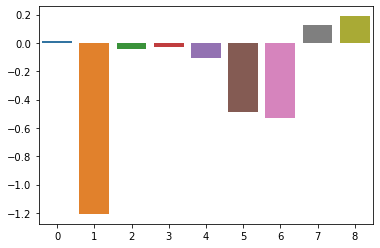

In [24]:
sns.barplot(list(range(len(w))), w)

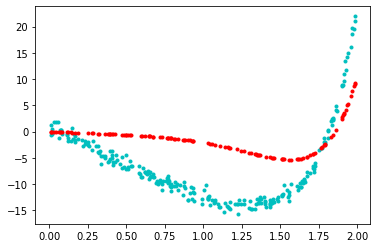

In [25]:
plt.scatter(x, y, c='c', marker = '.')
plt.scatter(x[part:], X_test @ w, c='r', marker ='.')
plt.show()

### Попробуем также поучиться с нормированными признаками

In [26]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

const_feature = np.ones(X_train.shape[0]).reshape(-1, 1)

X_train = np.hstack((X_train, const_feature))
X_test = np.hstack((X_test, const_feature))
print(X_train.shape, X_test.shape)

(125, 10) (125, 10)


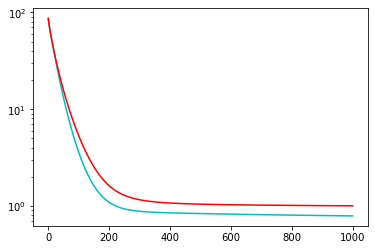

In [27]:
w0 = np.random.normal(0, 0.4, X_train.shape[1])
w = w0
lr = 10e-5
mu = 0.1
iter_number = 1000

train_losses = []
test_losses = []

for _ in range(iter_number):
    
    w = make_L1_GD_iteration(X_train, y_train, w, mu, lr)
    
    y_train_pred = X_train @ w
    y_test_pred = X_test @ w
    
    mse_train = mean_squared_error(y_train_pred, y_train)
    mse_test = mean_squared_error(y_test_pred, y_test)
    
    train_losses.append(mse_train)
    test_losses.append(mse_test)

plt.plot(range(len(train_losses)), train_losses, c='c')
plt.plot(range(len(test_losses)), test_losses, c='r')
plt.yscale('log')
plt.show()

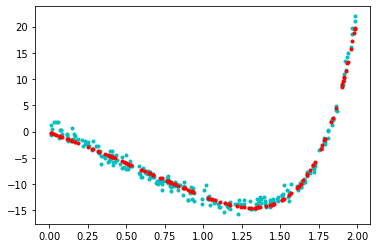

In [28]:
plt.scatter(x, y, c='c', marker = '.')
plt.scatter(x[part:], X_test @ w, c='r', marker ='.')
plt.show()

### KFold: WIP

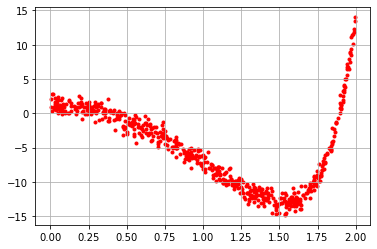

In [184]:
SIZE = 600
x = 2 * np.random.rand(SIZE)
y = np.exp(x ** 2) - 10 * (x**2)
y += np.random.normal(0, .8, SIZE)
fig, ax = plt.subplots()
ax.scatter(x,y, c='r', marker = '.')
ax.grid()
plt.show()

DEGREE = 8
polynomial_features = PolynomialFeatures(degree = DEGREE)
X = polynomial_features.fit_transform(x.reshape(-1,1))

In [185]:
n_splits = 4

kf = KFold(n_splits=n_splits)
KFold(n_splits=n_splits, random_state=None, shuffle=True);

w0 = np.random.normal(0, 0.4, X_train.shape[1])
w = w0
lr = 10e-5
mu = 0.1
iter_number = 100

train_losses = []
test_losses = []

In [186]:
def train_Fold(X_train, y_train, mu=0.1, lr=10e-5, iter_number=1000):
    w0 = np.random.normal(0, 0.2, X_train.shape[1])
    w = w0
    for _ in range(iter_number):
        w = make_L1_GD_iteration(X_train, y_train, w, mu, lr)
    return w

def train_KFold(X, y, mu=0.1, lr=10e-5, iter_number=1000):
    losses = []
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train = standard_scaler.fit_transform(X_train)
        X_test = standard_scaler.transform(X_test)
        
        X_train[:,0]+=1
        X_test[:,0]+=1 
        
        w = train_Fold(X_train, y_train, mu=mu, lr=lr, iter_number=iter_number)
        
        mse = mean_squared_error(X_test @ w, y_test)
        losses.append(mse)
    return np.array(losses)
        
        

In [187]:
train_params = []

for mu in np.logspace(-2, 1, 4):
    for lr in np.logspace(-8, -4, 5):
        for iter_num in np.logspace(1, 3, 3):
            iter_number=int(np.round(iter_num))
            l = np.mean(train_KFold(X, y, mu=mu, lr=lr, iter_number=iter_number))
            train_params.append([iter_number, mu, lr, l])

In [193]:
train_params = np.array(train_params)
train_params = train_params[train_params[:,3].argsort()]
# print('optimal parameters are')
# for i in range(4):
#     print(['iterations =', 'mu =', 'lr = ', 'MSE ='][i], train_params[0][i])
# np.log10(train_params)
train_params[0][0:3]

array([1.e+03, 1.e-02, 1.e-04])

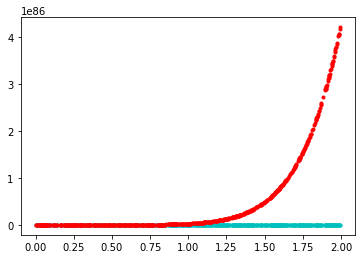

In [207]:
[mu, lr] = train_params[0][1:-1]
w = train_Fold(X, y, mu=mu, lr=lr, iter_number=30)
y_pred = X @ w;
plt.scatter(x, y, c='c', marker = '.')
plt.scatter(x, y_pred, c='r', marker ='.')
plt.show()

какая-то беда, но я очень старался :(

### Задача 4

In [217]:
from sklearn.datasets import load_diabetes
from sklearn import linear_model

In [218]:
X, y = load_diabetes(return_X_y = True)
print(X.shape, y.shape)

(442, 10) (442,)


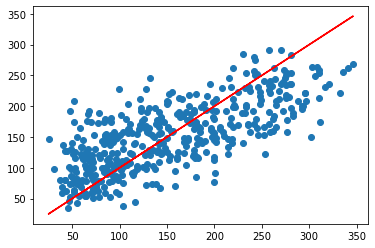

In [228]:
# вынем из коробки регрессию
iRegretSoMuch = linear_model.Lasso(alpha=1e-7)
iRegretSoMuch.fit(X, y)
w = iRegretSoMuch.coef_
fig, ax = plt.subplots()
ax.scatter(y, iRegretSoMuch.predict(X))
ax.plot(y, y, c='r')
plt.show()

In [254]:
# пойдём учиться с разными альфами
ws = []
alphas = np.logspace(-7, 2, 100)
for alpha in alphas:
    reg = linear_model.Lasso(alpha=alpha)
    reg.fit(X, y)
    w = reg.coef_
    ws.append(w)
ws = np.array(ws)
ws.T[0].shape

(100,)

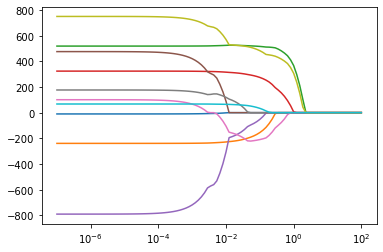

In [255]:
for w in ws.T:
    plt.plot(alphas, w)
plt.xscale('log')
plt.show()

Ура, веса действительно спадают в 0.